In [32]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [33]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool

output_notebook()

Loading BokehJS ...

In [80]:
url = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/3f21405a00bf7c93db5a5209b44886882feb30a6/by-boro.csv'
df_all = pd.read_csv(url, error_bad_lines=False)
df = df_all[df_all.BOROUGH_GROUP != 'Citywide']
df

,BOROUGH_GROUP,CASE_RATE,HOSPITALIZED_RATE,DEATH_RATE,CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT
0,Bronx,3219.19,826.81,252.56,46103,11841,3617
1,Brooklyn,2188.68,557.99,201.64,56530,14412,5208
2,Manhattan,1568.92,476.88,144.04,25553,7767,2346
3,Queens,2736.71,726.88,225.90,62367,16565,5148
4,StatenIsland,2853.97,484.27,175.77,13590,2306,837


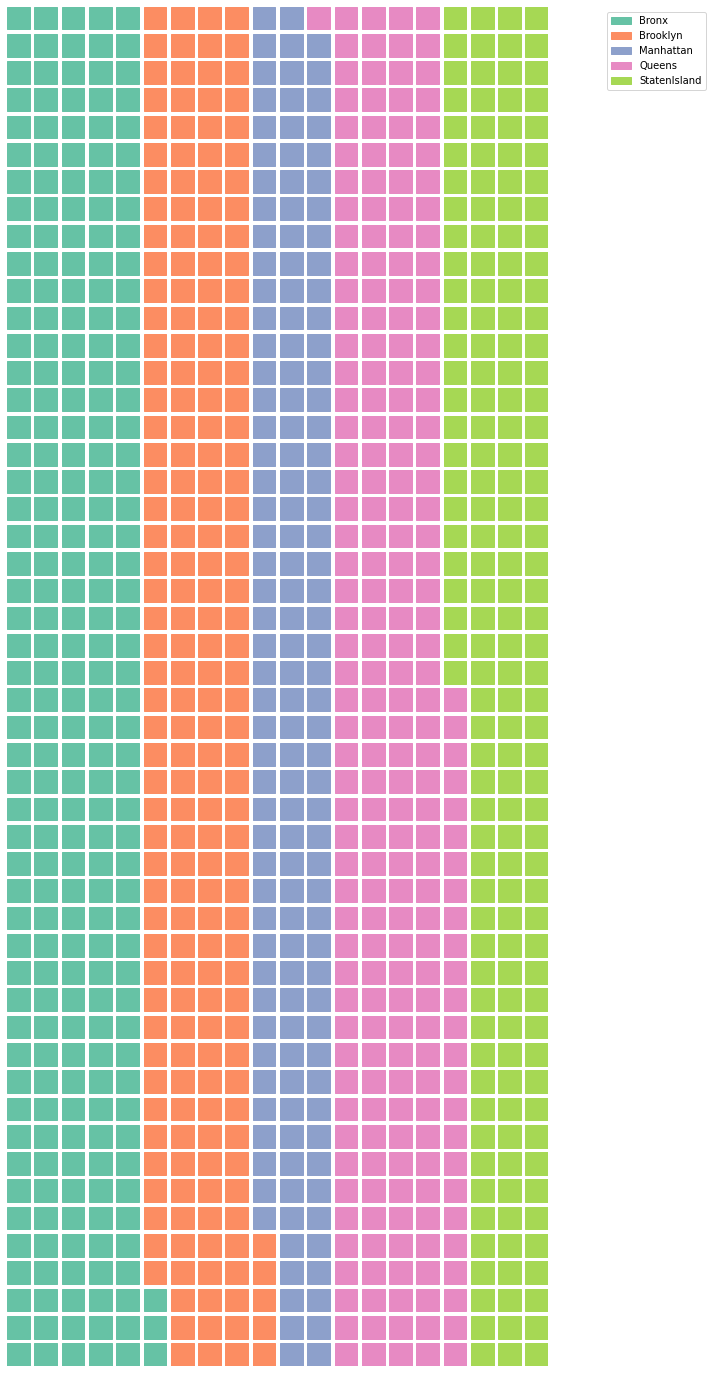

In [20]:
# df.BOROUGH_GROUP = df.BOROUGH_GROUP.astype(str)
# df.DEATH_COUNT = df.DEATH_COUNT.astype(int)

fig = plt.figure(
    FigureClass=Waffle, 
    rows=50,
    values=df.DEATH_RATE,
    labels=list(df.BOROUGH_GROUP),
    figsize=(10, 50),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
)

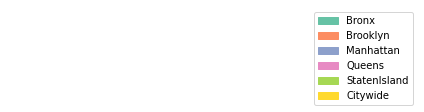

In [8]:
fig

In [5]:
type(df.DEATH_COUNT.values)

numpy.ndarray

In [6]:
fig

KeyboardInterrupt: 

In [ ]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, output_file, show


def make_plot(title, hist, edges, x, pdf, cdf):
    p = figure(title=title, tools='', background_fill_color="#fafafa")
    p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    p.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
    p.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")

    p.y_range.start = 0
    p.legend.location = "center_right"
    p.legend.background_fill_color = "#fefefe"
    p.xaxis.axis_label = 'x'
    p.yaxis.axis_label = 'Pr(x)'
    p.grid.grid_line_color="white"
    return p

# Weibull Distribution

lam, k = 1, 1.25
measured = lam*(-np.log(np.random.uniform(0, 1, 1000)))**(1/k)
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0.0001, 8, 1000)
pdf = (k/lam)*(x/lam)**(k-1) * np.exp(-(x/lam)**k)
cdf = 1 - np.exp(-(x/lam)**k)

p4 = make_plot("Weibull Distribution (λ=1, k=1.25)", hist, edges, x, pdf, cdf)

output_file('histogram.html', title="histogram.py example")

show(gridplot([p1,p2,p3,p4], ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

In [49]:
df.BOROUGH_GROUP = df.BOROUGH_GROUP.astype(str)
df.DEATH_COUNT = df.DEATH_COUNT.astype(int)

grouped = df[['BOROUGH_GROUP', 
                 'DEATH_COUNT']].copy()
# group = df.groupby(by=['BOROUGH_GROUP', 'DEATH_COUNT'])
source = ColumnDataSource(grouped)

print(grouped)

  BOROUGH_GROUP  DEATH_COUNT
0         Bronx         3617
1      Brooklyn         5208
2     Manhattan         2346
3        Queens         5148
4  StatenIsland          837


In [57]:
from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
from bokeh.plotting import figure, output_file, show
output_file('munitions_by_country.html')

source = ColumnDataSource(grouped)
boroughs = source.data['BOROUGH_GROUP'].tolist()
p = figure(x_range=boroughs, toolbar_location=None)


color_map = factor_cmap(field_name='BOROUGH_GROUP',
                    palette=Spectral5, factors=boroughs)

p.vbar(x='BOROUGH_GROUP', top='DEATH_COUNT', source=source, width=0.70, color=color_map)

p.title.text ='Corona Deaths'
p.xaxis.axis_label = 'Country'
p.yaxis.axis_label = 'Kilotons of Munitions'

show(p)

In [63]:
# import necessary modules 
from bokeh.plotting import Histogram, output_notebook, show 
import pandas as pd 
  
# output to notebook 
output_notebook() 
  
# read data in dataframe 
# df = pd.read_csv(r"D:/kaggle / mcdonald / menu.csv") 
  
# create histogram 
p = Histogram(df, values = "DEATH_RATE", 
               title = "Total Fat Distribution",  
               color = "navy") 
  
# show the results 
show(p)  

ImportError: cannot import name 'Histogram' from 'bokeh.plotting' (C:\Users\Tola\Anaconda3\lib\site-packages\bokeh\plotting\__init__.py)

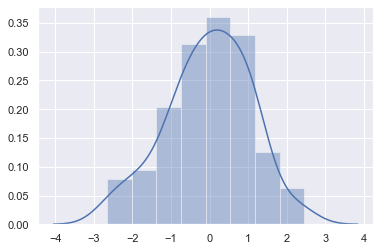

In [64]:
from scipy import stats
sns.set(color_codes=True)


x = np.random.normal(size=100)
sns.distplot(x);

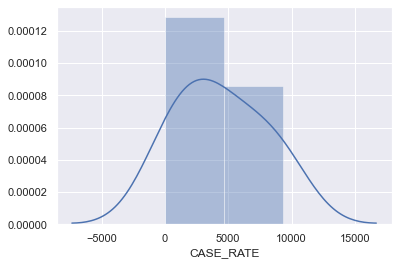

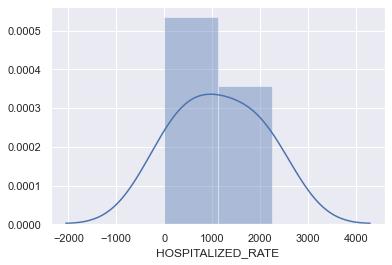

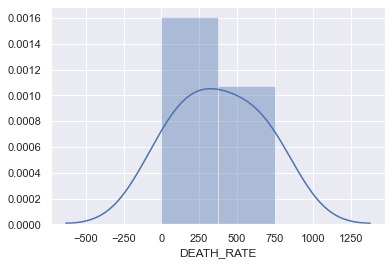

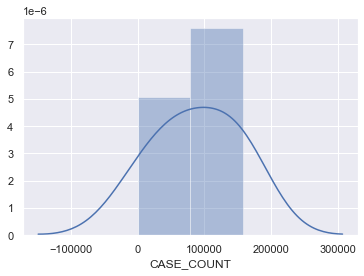

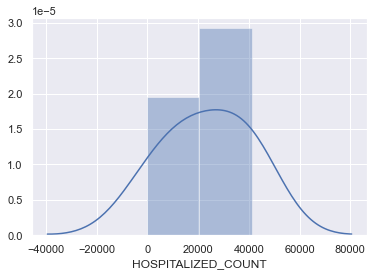

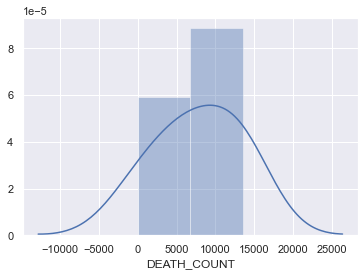

In [81]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 2]

%matplotlib inline

# sample time series data
# np.random.seed(123)
# df = pd.DataFrame(np.random.randint(-10,12,size=(300, 4)), columns=list('ABCD'))
# datelist = pd.date_range(pd.datetime(2014, 7, 1).strftime('%Y-%m-%d'), periods=300).tolist()
# df['dates'] = datelist 
df = df.set_index(['BOROUGH_GROUP'])
# df.index = pd.to_datetime(df.index)
df.iloc[0]=0
df=df.cumsum()

# create distplots
for column in df.columns:
    plt.figure()             # <==================== here!
    sns.distplot(df[column])

In [79]:
df

,A,B,C,D
dates,,,,
2014-07-01,0,0,0,0
2014-07-02,7,9,0,-9
2014-07-03,-10,7,5,-1
2014-07-04,-10,4,-10,5
2014-07-05,9,4,-6,-10
...,...,...,...,...
2015-04-22,7,4,-5,6
2015-04-23,-6,4,5,8
2015-04-24,-8,-8,4,5


In [61]:
# Plot a complex chart with intearctive hover in a few lines of code

from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure
from bokeh.sampledata.autompg import autompg_clean as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
df.yr = df.yr.astype(str)

group = df.groupby(by=['cyl', 'mfr'])
source = ColumnDataSource(group)

p = figure(plot_width=800, plot_height=300, title="Mean MPG by # Cylinders and Manufacturer",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c'], 
                         factors=sorted(df.cyl.unique()), end=1)

p.vbar(x='cyl_mfr', top='mpg_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

In [ ]:
# from bokeh.models import ColumnDataSource, HoverTool
# from bokeh.plotting import figure
from bokeh.transform import factor_cmap

# df.BOROUGH_GROUP = df.BOROUGH_GROUP.astype(str)
# df.DEATH_COUNT = df.DEATH_COUNT.astype(str)

# group = df.groupby(by=['BOROUGH_GROUP', 'DEATH_COUNT'])
# source = ColumnDataSource(df)

p = figure(plot_width=800, plot_height=300, title="Death Rate by Borough",
           x_range=group, toolbar_location=None, tools="")

p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Manufacturer grouped by # Cylinders"
p.xaxis.major_label_orientation = 1.2

index_cmap = factor_cmap('cyl_mfr', palette=['#2b83ba', '#abdda4', '#ffffbf', '#fdae61', '#d7191c', '#d7191c'], 
                         factors=sorted(df.BOROUGH_GROUP.unique()), end=1)

p.vbar(x='cyl_mfr', top='DEATH_COUNT_mean', width=1, source=source,
       line_color="white", fill_color=index_cmap, 
       hover_line_color="darkgrey", hover_fill_color=index_cmap)

p.add_tools(HoverTool(tooltips=[("MPG", "@mpg_mean"), ("Cyl, Mfr", "@cyl_mfr")]))

show(p)

In [ ]:
from bokeh.sampledata.autompg import autompg_clean as df2
df2.head()
